In [1]:
from glob import glob
import numpy as np 
import pandas as pd
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings('ignore')

import argparse
import gc
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from piece_detector import *


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
img_groups = [glob(f'train_imgs/g{i} *') for i in range(1, 3)]

In [3]:
img1 = cv2.cvtColor(cv2.imread('train_imgs/g1 (1).jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('train_imgs/g1 (2).jpg'), cv2.COLOR_BGR2RGB)

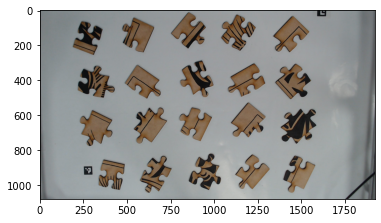

In [4]:
plt.imshow(img1)

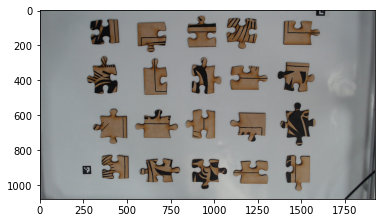

In [5]:
plt.imshow(img2)

In [6]:
detector = Detector()

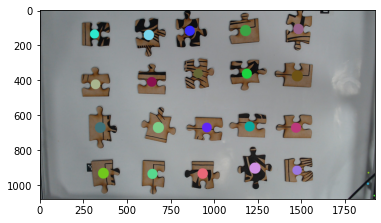

In [7]:
img = cv2.cvtColor(cv2.imread('train_imgs/g2 (3).jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(detector.process(img.copy())[0])

In [54]:
import copy
img_lists = []
for img_group in img_groups:
    
    detector = Detector()
    
    img = cv2.cvtColor(cv2.imread(img_group[0]), cv2.COLOR_BGR2RGB) 
    detector.process(img.copy())
    pieces_list = [p for p in detector.pieces]
    
    img_list = [[] for i in range(len(pieces_list))]
    
    for img_path in img_group:
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 
        detector.process(img.copy())
        
        for i, piece in enumerate(pieces_list):
            img_height, img_width, _ = img.shape
            x = piece.x
            y = piece.y
            w = piece.width + 50
            h = piece.height + 50
            img_chunk = img[max(y-h//2, 0):min(y+h//2, img_height), max(x-w//2, 0):min(x+w//2, img_width)]
            img_list[i].append(img_chunk)
                
    img_lists.append(img_list)

In [55]:
len(img_lists)

2

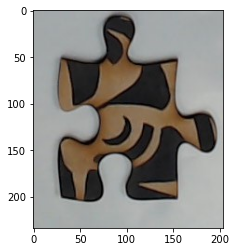

In [56]:
plt.imshow(img_lists[0][-5][4])